In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os  
from sklearn.preprocessing import RobustScaler,StandardScaler
from scipy.signal import spectrogram, get_window 
from sklearn.model_selection import train_test_split

In [3]:
# loading and preprocessing data 
def preprocess(directory):
    csv_files=[f for f in os.listdir(directory) if f.endswith('.csv')]  
    all_data=[]
    for i in csv_files:
        df=pd.read_csv(os.path.join(directory, i))  
        df.columns=['Output1','Output2','Output3','Output4','Output5','Output6','Output7','Output8'] 
        data=df.iloc[:, :4]  
        all_data.append(data) 
    my_data=pd.concat(all_data, ignore_index=True) 

    return my_data


In [4]:
data=preprocess('collected data')

In [5]:
start_markers = ['start one.png', 'start five.jpg', 'start nine.jpg', 'start six.jpg', 'start zero.png', 'start animal.jpg', 'start four.jpg', 'start eight.jpg', 'start three.jpg', 'start seven.jpg', 'start two.jpg']
end_markers = ['end one.png', 'end five.jpg', 'end nine.jpg', 'end six.jpg', 'end zero.png', 'end animal.jpg', 'end four.jpg', 'end eight.jpg', 'end three.jpg', 'end seven.jpg', 'end two.jpg']

In [6]:
def extract_center_rows(data, start_range, end_range, length):
    if start_range > end_range:
        raise ValueError("start_range should be less than or equal to end_range")
    
    if end_range - start_range < length:
        return False, 0
    
    range_data = data.loc[start_range:end_range]
    if length > len(range_data):
        raise ValueError("The specified length is greater than the number of rows in the range")
    
    center_index = len(range_data) // 2
    start_index = max(0, center_index - length // 2)
    end_index = start_index + length
    center_rows = range_data.iloc[start_index:end_index]
    
    return True, center_rows 
def extract_data_between_markers(data, start_markers, end_markers, datashape):
    X = []
    Y = []
    between_markers = False
    label = None
    start_idx = None
    end_idx = None
    df_temp = []
    segment_lengths = []
    
    marker_to_label = {
        'start one.png': 1, 'end one.png': 1,
        'start two.jpg': 2, 'end two.jpg': 2,
        'start three.jpg': 3, 'end three.jpg': 3,
        'start four.jpg': 4, 'end four.jpg': 4,
        'start five.jpg': 5, 'end five.jpg': 5,
        'start six.jpg': 6, 'end six.jpg': 6,
        'start seven.jpg': 7, 'end seven.jpg': 7,
        'start eight.jpg': 8, 'end eight.jpg': 8,
        'start nine.jpg': 9, 'end nine.jpg': 9,
        'start zero.png': 0, 'end zero.png': 0,
        'start animal.jpg': -1, 'end animal.jpg': -1
    }
    
    for index, row in data.iterrows():
        if row.iloc[0] in start_markers:
            label = marker_to_label[row.iloc[0]]
            start_idx = index
            between_markers = True
            df_temp = []
           
        elif row.iloc[0] in end_markers:
            if between_markers and len(df_temp) > 0:
                end_idx = index
                success, extracted_data = extract_center_rows(data, start_idx, end_idx, datashape[0])
                if success:
                    X.append(extracted_data.values.astype(float))
                    Y.append(label)
                  
                segment_lengths.append(len(df_temp))
            between_markers = False
        elif between_markers:
            df_temp.append(row.iloc[:4].values.tolist())
    
    X = np.array(X)
    Y = np.array(Y)
    
    print("Total segments found:", len(segment_lengths))
    print("Segment lengths:", segment_lengths)
    print("Number of segments meeting length requirement:", len(X))
    
    return X, Y

In [7]:
datashape = (1100, 4)

X, Y = extract_data_between_markers(data, start_markers, end_markers, datashape)


print("X shape:", X.shape)
print("Y shape:", Y.shape)

print("Unique labels in Y:", np.unique(Y))

Total segments found: 187
Segment lengths: [1280, 1280, 1280, 1155, 1280, 1280, 1280, 1280, 1408, 1205, 1280, 1210, 1280, 1280, 1280, 1280, 1231, 1220, 1299, 1280, 1280, 1280, 1152, 1280, 1188, 1280, 1280, 1280, 1152, 1280, 1194, 1152, 1280, 1152, 1280, 1280, 1280, 1280, 1280, 1280, 1280, 1280, 1281, 1195, 1381, 1159, 1280, 1280, 1280, 1280, 1280, 1280, 1183, 1280, 1280, 1280, 1280, 1280, 1280, 1280, 1187, 1280, 1280, 1280, 1280, 1304, 1024, 1664, 704, 1408, 1280, 896, 279, 3072, 1280, 896, 2176, 1280, 1280, 1203, 1280, 1280, 1195, 1280, 1280, 1280, 1280, 1280, 1280, 1280, 1280, 1280, 1280, 1280, 1280, 1173, 1280, 1280, 1152, 1280, 1280, 1280, 1280, 1166, 1152, 1280, 1280, 1280, 1280, 1280, 1162, 1212, 1280, 1280, 1280, 1280, 1792, 1280, 1280, 1224, 1280, 1187, 1280, 1280, 1152, 1280, 1280, 1280, 1169, 1280, 1280, 1280, 1280, 1280, 1213, 1280, 1280, 1280, 1280, 1165, 1280, 1280, 1280, 1280, 1280, 1280, 1280, 1280, 1280, 1280, 1280, 1152, 1280, 1280, 1304, 1280, 1024, 1280, 1152, 1280, 

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
print("X_train shape:", X_train.shape) 
print('X_val shape:', X_val.shape)

X_train shape: (144, 1100, 4)
X_val shape: (37, 1100, 4)


In [10]:

# Time slicing Augmentation 
def augment_signal_multichannel(signal, slice_range=5):
    num_channels = signal.shape[1]
    signal_length = signal.shape[0]
    augmented_signals = []
    for i in range(-slice_range, slice_range + 1):
        augmented_slice = np.zeros_like(signal)
        for channel in range(num_channels):
            if i < 0:
                slice_data = signal[max(0, -i):min(signal_length, signal_length - i), channel]
                slice_data = np.pad(slice_data, (0, signal_length - len(slice_data)), 'constant')
                augmented_slice[:, channel] = slice_data
            else:
                slice_data = signal[max(0, i):min(signal_length, signal_length - i), channel]
                slice_data = np.pad(slice_data, (0, signal_length - len(slice_data)), 'constant')
                augmented_slice[:, channel] = slice_data
        augmented_signals.append(augmented_slice)
    return augmented_signals


X_augmented = []
Y_augmented = []

# Apply augmentation to each sample
for signal, label in zip(X_train, Y_train):
    X_augmented.append(signal)
    Y_augmented.append(label)
    
    augmented_signals = augment_signal_multichannel(signal)
    for augmented_signal in augmented_signals:
        X_augmented.append(augmented_signal)
        Y_augmented.append(label)


X_train = np.array(X_augmented)
Y_train = np.array(Y_augmented)

print(f'size of X_train after augmentation: {np.shape(X_train)}, size of Y_train after augmentation: {np.shape(Y_train)}')


size of X_train after augmentation: (1728, 1100, 4), size of Y_train after augmentation: (1728,)


In [11]:
scaler = StandardScaler()
scaler.fit(X_val[0]) 

for i,x in enumerate(X_train):
    X_train[i] = scaler.transform(x)  
for i,x in enumerate(X_val):    
    X_val[i] = scaler.transform(x)
    

In [12]:
#plotting spectrograms
num_signals, num_time_points, num_channels = X.shape
T = 2  # Duration in seconds
fs = num_time_points / T
print(f"Estimated sampling frequency: {fs} Hz")

Estimated sampling frequency: 550.0 Hz


In [13]:
# Parameters for spectrogram
window = get_window('hann', 256)  # Hann window with 256 samples
nperseg = 256
noverlap = nperseg // 2  # 50% overlap
nfft = nperseg * 2



In [14]:
#creating spectrograms for validation data (has no augmented data)  
    
output_dir='/Users/shrutisekhar/Desktop/bcs project/spectrogram_grid_val' 
os.makedirs(output_dir, exist_ok=True)  

for example_idx in range(X_val.shape[0]):
    example = X_val[example_idx]
    example_label = Y_val[example_idx]
    
    
    fig, axs = plt.subplots(2, 2, figsize=(8, 6)) 

    
    for channel_idx in range(example.shape[1]):
        signal = example[:, channel_idx]
        f, t, Sxx = spectrogram(signal, fs=fs, nperseg=nperseg, noverlap=noverlap, nfft=nfft)
        
       
        row = channel_idx // 2
        col = channel_idx % 2
        axs[row, col].pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto')
        axs[row, col].axis('off')  

    
    combined_image_path = os.path.join(output_dir, f'{example_idx + 1}_label_{example_label}.png')
    plt.subplots_adjust(wspace=0.2, hspace=0.2)  
    plt.tight_layout(pad=1.0) 
    plt.savefig(combined_image_path, bbox_inches='tight')  
    plt.close(fig)  


In [15]:
#creating spectrograms for training data

output_dir='/Users/shrutisekhar/Desktop/bcs project/spectrogram_grid'
os.makedirs(output_dir, exist_ok=True) 

for example_idx in range(X_train.shape[0]):
    example = X_train[example_idx]
    example_label = Y_train[example_idx]
    

    fig, axs = plt.subplots(2, 2, figsize=(8, 6)) 

    
    for channel_idx in range(example.shape[1]):
        signal = example[:, channel_idx]
        f, t, Sxx = spectrogram(signal, fs=fs, nperseg=nperseg, noverlap=noverlap, nfft=nfft)
        
       
        row = channel_idx // 2
        col = channel_idx % 2
        axs[row, col].pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto')
        axs[row, col].axis('off')  

   
    combined_image_path = os.path.join(output_dir, f'{example_idx + 1}_label_{example_label}.png')
    plt.subplots_adjust(wspace=0.2, hspace=0.2)  
    plt.tight_layout(pad=1.0)  
    plt.savefig(combined_image_path, bbox_inches='tight') 
    plt.close(fig)   



In [16]:
import os
import cv2
def data_from_folder(model='Resnet158'):
 output_dir = ['/Users/shrutisekhar/Desktop/bcs project/spectrogram_grid','/Users/shrutisekhar/Desktop/bcs project/spectrogram_grid_val'] 
 X_spec = []
 labels = [] 
 X_spec_val=[]
 labels_val=[]



 for i in range(len(output_dir)):
    
    for filename in os.listdir(output_dir[i]):
        if filename.endswith('.png'):  
            parts = filename.split('_')
            example_label = int(parts[-1].split('.')[0])  
        
       
            image_path = os.path.join(output_dir[i], filename)
            img = cv2.imread(image_path) 
            if model=='Resnet158' or model=='MobileNet':
               img=cv2.resize(img,(244,244)) 
            if model=='NASNetLarge': 
                img=cv2.resize(img,(331,331)) 
            if model=='InceptionvV3':
                img=cv2.resize(img,(299,299)) 
            if output_dir[i]=='/Users/shrutisekhar/Desktop/bcs project/spectrogram_grid':
              X_spec.append(img) 
              labels.append(example_label+1) 
            if output_dir[i]=='/Users/shrutisekhar/Desktop/bcs project/spectrogram_grid_val':
              X_spec_val.append(img) 
              labels_val.append(example_label+1)
        
        
            

 X_spec = np.array(X_spec)
 labels = np.array(labels) 

 X_spec_val = np.array(X_spec_val)
 labels_val = np.array(labels_val)

 print(f'size of X:{np.shape(X_spec)}, size of y:{np.shape(labels)}')  
 print(f'size of X_val:{np.shape(X_spec_val)}, size of y_val:{np.shape(labels_val)}')

 return X_spec, labels, X_spec_val, labels_val


size of X:(2868, 244, 244, 3), size of y:(2868,)
size of X_val:(73, 244, 244, 3), size of y_val:(73,)


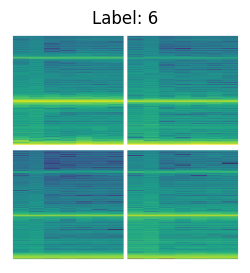

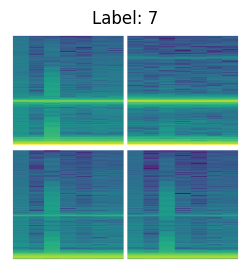

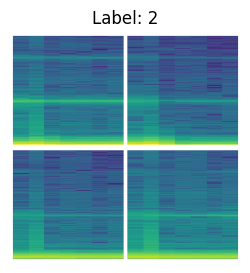

In [17]:
X_train,labels, X_val, labels_val=data_from_folder()
for i in range(3):
    example_image = X_val[i]
    label = labels_val[i]
    
    # Plot the spectrogram grid images
    plt.figure(figsize=(3, 3))
    plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
    plt.title(f'Label: {label-1}') #converted label range to 0-10
    plt.axis('off')  
    plt.show()  


In [18]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import load_model,Model
from tensorflow.keras.applications import ResNet152,NASNetLarge,InceptionV3,MobileNet,ResNet50
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

/Users/shrutisekhar/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [22]:
#Resnet158
X_train,labels, X_val, labels_val=data_from_folder() 
X_train,X_val=X_train/255.0,X_val/255.0


resnet_base = ResNet152(weights='imagenet', include_top=False, input_shape=(244,244,3)) 
x = GlobalAveragePooling2D()(resnet_base.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(11, activation='softmax')(x)  # Output layer with 11 classes and softmax activation
model = Model(inputs=resnet_base.input, outputs=predictions) 
model.compile(optimizer=optimizers.RMSprop(learning_rate=5e-5), loss='sparse_categorical_crossentropy', metrics=['acc']) 
resnet_history = model.fit(X_train, labels, validation_data=(X_val, labels_val), epochs=5)

size of X:(2868, 244, 244, 3), size of y:(2868,)
size of X_val:(73, 244, 244, 3), size of y_val:(73,)
Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 1023s 11s/step - acc: 0.7486 - loss: 0.9683 - val_acc: 0.0822 - val_loss: 5.5378
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 990s 11s/step - acc: 1.0000 - loss: 0.0023 - val_acc: 0.0822 - val_loss: 15.8794
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 994s 11s/step - acc: 1.0000 - loss: 7.3507e-04 - val_acc: 0.0822 - val_loss: 24.8776
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 985s 11s/step - acc: 1.0000 - loss: 3.8647e-04 - val_acc: 0.0822 - val_loss: 30.3242
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 999s 11s/step - acc: 1.0000 - loss: 3.0705e-04 - val_acc: 0.0822 - val_loss: 28.4555


In [20]:
#Resnet50

X_train,labels, X_val, labels_val=data_from_folder() 
X_train,X_val=X_train/255.0,X_val/255.0


resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(244,244,3)) 
x = GlobalAveragePooling2D()(resnet_base.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(11, activation='softmax')(x)  # Output layer with 11 classes and softmax activation
model = Model(inputs=resnet_base.input, outputs=predictions) 
model.compile(optimizer=optimizers.RMSprop(learning_rate=5e-5), loss='sparse_categorical_crossentropy', metrics=['acc']) 
resnet50_history = model.fit(X_train, labels, validation_data=(X_val, labels_val), epochs=5)

size of X:(2868, 244, 244, 3), size of y:(2868,)
size of X_val:(73, 244, 244, 3), size of y_val:(73,)
Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - acc: 0.7376 - loss: 1.0196 - val_acc: 0.0548 - val_loss: 2.7643
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 416s 5s/step - acc: 1.0000 - loss: 0.0042 - val_acc: 0.1096 - val_loss: 4.0818
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 432s 5s/step - acc: 1.0000 - loss: 9.7073e-04 - val_acc: 0.0548 - val_loss: 7.1148
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 419s 5s/step - acc: 1.0000 - loss: 5.5695e-04 - val_acc: 0.0548 - val_loss: 6.9319
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 419s 5s/step - acc: 1.0000 - loss: 3.7381e-04 - val_acc: 0.0548 - val_loss: 5.7951


In [21]:
#MobileNet
X_train,labels,X_val,labels_val=data_from_folder(model='MobileNet')

X_train,X_val=X_train/255.0,X_val/255.0  


mobilenet_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(244, 244, 3)) 
x=GlobalAveragePooling2D()(mobilenet_base.output)
x = Dropout(0.5)(x) 
x = mobilenet_base.output 
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(11, activation='softmax')(x)

model = Model(inputs=mobilenet_base.input, outputs=predictions) 
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
mobilenet_history = model.fit(X_train, labels, validation_data=(X_val, labels_val), epochs=5)

size of X:(2868, 244, 244, 3), size of y:(2868,)
size of X_val:(73, 244, 244, 3), size of y_val:(73,)
Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.1302 - loss: 3.0131 - val_accuracy: 0.0548 - val_loss: 14.8684
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.5778 - loss: 1.2926 - val_accuracy: 0.0822 - val_loss: 28.4242
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.8937 - loss: 0.3996 - val_accuracy: 0.1918 - val_loss: 25.2682
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.9158 - loss: 0.2824 - val_accuracy: 0.2740 - val_loss: 6.3091
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9697 - loss: 0.1108 - val_accuracy: 0.2466 - val_loss: 23.9659


In [19]:
#InceptionV3 
X_train,labels,X_val,labels_val=data_from_folder(model='InceptionvV3')

X_train,X_val=X_train/255.0,X_val/255.0  


v3_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3)) 
x=GlobalAveragePooling2D()(v3_base.output)
x = v3_base.output 
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(11, activation='softmax')(x)

model = Model(inputs=v3_base.input, outputs=predictions) 
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
v3_history = model.fit(X_train, labels, validation_data=(X_val, labels_val), epochs=5)


size of X:(2868, 299, 299, 3), size of y:(2868,)
size of X_val:(73, 299, 299, 3), size of y_val:(73,)
Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 397s 4s/step - accuracy: 0.1112 - loss: 2.9558 - val_accuracy: 0.0822 - val_loss: 44.0434
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 356s 4s/step - accuracy: 0.1597 - loss: 2.3016 - val_accuracy: 0.0685 - val_loss: 20.0117
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 385s 4s/step - accuracy: 0.2785 - loss: 1.8742 - val_accuracy: 0.0959 - val_loss: 9.8646
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 365s 4s/step - accuracy: 0.6435 - loss: 0.9374 - val_accuracy: 0.2055 - val_loss: 2.9814
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 341s 4s/step - accuracy: 0.8603 - loss: 0.4177 - val_accuracy: 0.2192 - val_loss: 7.2348


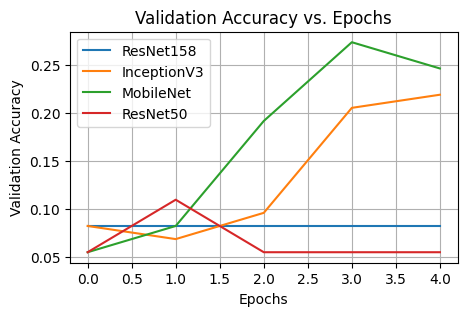

In [29]:
plt.figure(figsize=(5, 3))

plt.plot(resnet_history.history['val_acc'], label='ResNet158')
plt.plot(v3_history.history['val_accuracy'], label='InceptionV3')
plt.plot(mobilenet_history.history['val_accuracy'], label='MobileNet') 
plt.plot(resnet50_history.history['val_acc'], label='ResNet50')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()

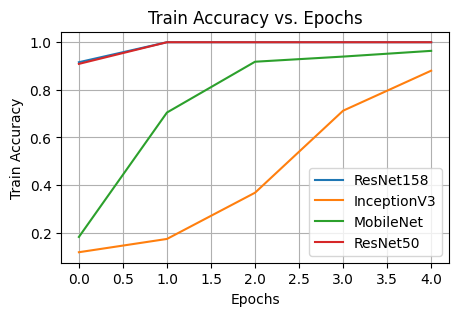

In [30]:
plt.figure(figsize=(5, 3))

plt.plot(resnet_history.history['acc'], label='ResNet158')
plt.plot(v3_history.history['accuracy'], label='InceptionV3')
plt.plot(mobilenet_history.history['accuracy'], label='MobileNet') 
plt.plot(resnet50_history.history['acc'], label='ResNet50')

plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracy vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()